# LA LIGA DATA ANALYSIS

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [56]:
with sqlite3.connect("../laliga.sqlite") as con:
    df = pd.read_sql("""SELECT * FROM Matches""", con = con)
	


In [57]:
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


In [58]:
num_valores_none = df["score"].isna().sum()
num_valores_none

780

Taking into account that the number of cells without score is 1.6% we decided to work with another data frame without this values.

In [59]:
df_clean = df.dropna(subset = ["score"]).copy()
df_clean

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0


In [60]:
df_clean[['score_home', 'score_visitor']] = df_clean['score'].str.split(':', expand=True)
df_clean

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2
...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1,2,1
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1,2,1
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2,0,2
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,0,0


In [61]:
df_clean.dtypes

season           object
division          int64
matchday          int64
date             object
time             object
home_team        object
away_team        object
score            object
score_home       object
score_visitor    object
dtype: object

In [62]:
df_clean['score_home'] = pd.to_numeric(df_clean['score_home']).astype(int)
df_clean['score_visitor'] = pd.to_numeric(df_clean['score_visitor']).astype(int)

In [63]:
df_clean.dtypes

season           object
division          int64
matchday          int64
date             object
time             object
home_team        object
away_team        object
score            object
score_home        int32
score_visitor     int32
dtype: object

In [64]:
df_clean['result'] = "None"
df_clean.loc[df_clean['score_home'] > df_clean['score_visitor'], 'result'] = "Home"
df_clean.loc[df_clean['score_home'] < df_clean['score_visitor'], 'result'] = "Visitor"
df_clean.loc[df_clean['score_home'] == df_clean['score_visitor'], 'result'] = "Tie"
df_clean

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor,result
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3,Visitor
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2,Home
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0,Home
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1,Tie
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2,Visitor
...,...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1,2,1,Home
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1,2,1,Home
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2,0,2,Visitor
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,0,0,Tie


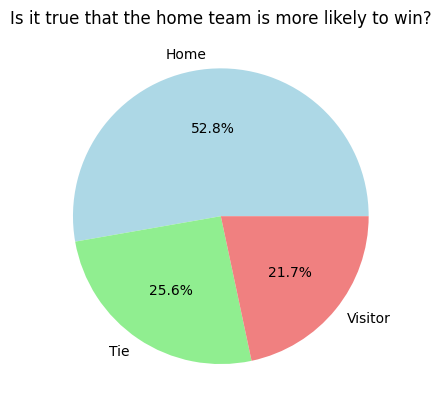

In [65]:
colors = ['lightblue', 'lightgreen', 'lightcoral']
grafico = df_clean['result'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
grafico.set_ylabel('')
grafico.set_title('Is it true that the home team is more likely to win?')
plt.show()

## EJERCICIO2

In [42]:
home_goals = df_clean.loc[df_clean['division'] == 1].groupby('home_team')['score_home'].sum()
away_goals = df_clean.loc[df_clean['division'] == 1].groupby('away_team')['score_visitor'].sum()
total_goals = home_goals.add(away_goals, fill_value=0)
TOP_total_goals = total_goals.sort_values(ascending=False).head(10)

In [43]:
home_goals_conceded = df_clean.loc[df_clean['division'] == 1].groupby('home_team')['score_visitor'].sum()
away_goals_conceded = df_clean.loc[df_clean['division'] == 1].groupby('away_team')['score_home'].sum()
total_goals_conceded = home_goals_conceded.add(away_goals_conceded, fill_value=0)
TOP_total_goals_conceded = total_goals_conceded.sort_values(ascending=False).head(10)

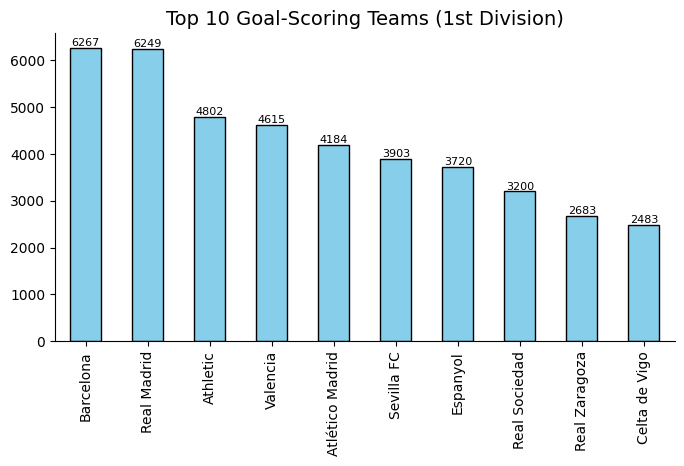

In [44]:
figure_1, axes_1 = plt.subplots(figsize=(8, 4))
TOP_total_goals.plot(kind='bar', ax=axes_1, color='skyblue', edgecolor='black')

plt.title('Top 10 Goal-Scoring Teams (1st Division)', fontsize=14)
plt.ylabel('')
plt.xlabel('')

for i, v in enumerate(TOP_total_goals):
    axes_1.text(i, v + 0.5, int(v), ha='center', va='bottom', fontsize=8)

axes_1.spines['top'].set_visible(False)
axes_1.spines['right'].set_visible(False)

plt.show()


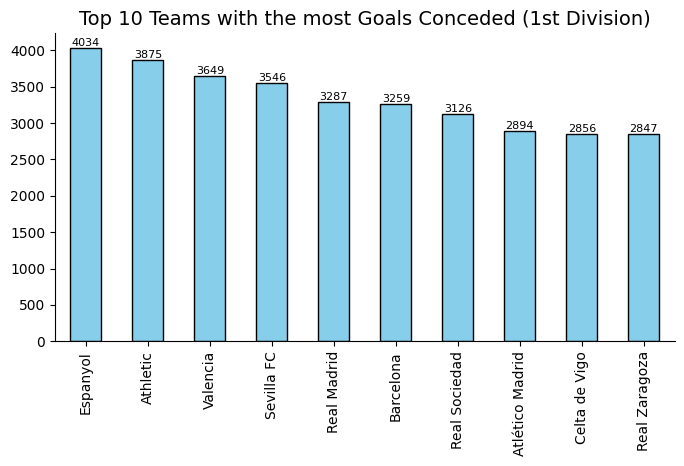

In [45]:
figure_2, axes_2 = plt.subplots(figsize=(8, 4))
TOP_total_goals_conceded.plot(kind='bar', ax=axes_2, color='skyblue', edgecolor='black')

plt.title('Top 10 Teams with the most Goals Conceded (1st Division)', fontsize=14)
plt.ylabel('')
plt.xlabel('')

for i, v in enumerate(TOP_total_goals_conceded):
    axes_2.text(i, v + 0.5, int(v), ha='center', va='bottom', fontsize=8)

axes_2.spines['top'].set_visible(False)
axes_2.spines['right'].set_visible(False)

plt.show()

In [67]:
df_clean['goal_difference'] = abs(df_clean['score_home'] - df_clean['score_visitor']).astype(int)
highest_goal_dif = df_clean[df_clean['division'] == 1].sort_values('goal_difference', ascending = False).head(10)
highest_goal_dif

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor,result,goal_difference
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,12,1,Home,11
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,11,1,Home,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,10,0,Home,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,10,0,Home,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,10,0,Home,10
3629,1953-1954,1,26,3/28/54,None,Barcelona,Real Oviedo,9:0,9,0,Home,9
10024,1978-1979,1,16,1/14/79,None,Barcelona,Rayo Vallecano,9:0,9,0,Home,9
408,1932-1933,1,10,1/29/33,None,Racing,Alavés,9:0,9,0,Home,9
5027,1959-1960,1,21,2/7/60,None,Real Madrid,Elche CF,11:2,11,2,Home,9
3911,1955-1956,1,1,9/11/55,None,Atlético Madrid,Hércules CF,9:0,9,0,Home,9


## Ejercicio 4

In [69]:
df_season_2021 = df_clean.loc[(df_clean['division'] == 1) & (df_clean["season"] == "2020-2021")]
df_season_2021

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor,result,goal_difference
25438,2020-2021,1,1,9/12/20,4:00 PM,SD Eibar,Celta de Vigo,0:0,0,0,Tie,0
25439,2020-2021,1,1,9/12/20,6:30 PM,Granada CF,Athletic,2:0,2,0,Home,2
25440,2020-2021,1,1,9/12/20,9:00 PM,Cádiz CF,CA Osasuna,0:2,0,2,Visitor,2
25441,2020-2021,1,1,9/13/20,2:00 PM,Alavés,Real Betis,0:1,0,1,Visitor,1
25442,2020-2021,1,1,9/13/20,4:00 PM,Real Valladolid,Real Sociedad,1:1,1,1,Tie,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25813,2020-2021,1,38,5/22/21,6:00 PM,CA Osasuna,Real Sociedad,0:1,0,1,Visitor,1
25814,2020-2021,1,38,5/22/21,6:00 PM,Real Madrid,Villarreal,2:1,2,1,Home,1
25815,2020-2021,1,38,5/22/21,6:00 PM,Real Valladolid,Atlético Madrid,1:2,1,2,Visitor,1
25816,2020-2021,1,38,5/23/21,6:30 PM,Granada CF,Getafe,0:0,0,0,Tie,0
